# Analysis of IDOL Data

## Description

The IDOL dataset is a collection of IMU data collected with an iPhone 8 and a Stencil Kaarta SLAM rig. Positioning data from both devices was collected by 15 individuals that went around three different buildings. They had planned trajectories and unplanned trajectories in order to introduce some variation in the data.  

## Features

The dataset presents a variety of positioning features for each different device. These are divided into x, y an z positioning data. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import glob
from mpl_toolkits import mplot3d

from matplotlib import pyplot as plt
from pprint import pprint

plt.rcParams["figure.figsize"] = (18,20)

In [4]:
building_filenames = set(glob.glob("datasets/*/*/*.feather"))
training_filenames = set(glob.glob("datasets/building1/train/*.feather"))
final_filenames = building_filenames - training_filenames


In [30]:
df = pd.read_feather("datasets/building1/known/0.feather")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/building1/known/0.feather'

In [8]:
df.columns

Index(['index', 'orientW', 'timestamp', 'iphoneOrientW', 'orientZ', 'orientX',
       'stencilGyroX', 'stencilGyroY', 'stencilGyroZ', 'stencilAccY',
       'stencilAccX', 'stencilAccZ', 'iphoneOrientX', 'iphoneOrientY',
       'iphoneOrientZ', 'orientY', 'iphoneMagX', 'iphoneMagY', 'iphoneMagZ',
       'iphoneAccX', 'iphoneAccY', 'iphoneAccZ', 'iphoneGyroX', 'iphoneGyroY',
       'iphoneGyroZ', 'processedPosX', 'processedPosY', 'processedPosZ'],
      dtype='object')

In [9]:
df.describe()

,index,orientW,timestamp,iphoneOrientW,orientZ,orientX,stencilGyroX,stencilGyroY,stencilGyroZ,stencilAccY,...,iphoneMagZ,iphoneAccX,iphoneAccY,iphoneAccZ,iphoneGyroX,iphoneGyroY,iphoneGyroZ,processedPosX,processedPosY,processedPosZ
count,37258.000000,37258.000000,3.725800e+04,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,...,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000,37258.000000
mean,37257.000000,0.576543,1.579201e+09,-0.080381,-0.042755,0.021739,0.003502,-0.025046,-0.005795,0.551279,...,-598.103589,-0.086221,0.019061,-1.018410,-0.010973,0.022686,-0.016938,-10.254981,3.242989,0.864965
std,21511.205003,0.373240,1.076273e+02,0.682479,0.722386,0.037442,0.138483,0.147535,0.688586,0.677608,...,5.448755,0.074542,0.071265,0.110668,0.133100,0.146409,0.688955,9.046720,2.227989,0.246337
min,0.000000,-0.003922,1.579201e+09,-0.999859,-0.999986,-0.108193,-0.695516,-0.670972,-2.512380,-2.540020,...,-610.056274,-0.495758,-0.269152,-1.764118,-0.978948,-0.694067,-2.514128,-34.154030,-2.826245,-0.029335
25%,18628.500000,0.185348,1.579201e+09,-0.830330,-0.867525,-0.001821,-0.082164,-0.122077,-0.391507,0.121901,...,-602.784128,-0.132319,-0.024622,-1.085199,-0.091775,-0.071331,-0.401555,-16.065888,1.099371,0.707164
50%,37257.000000,0.633116,1.579201e+09,-0.046196,0.012879,0.025728,0.004809,-0.021650,-0.009944,0.538284,...,-597.804227,-0.085279,0.019175,-1.010882,-0.011672,0.018428,-0.020394,-9.657707,4.218563,0.860282
75%,55885.500000,0.972964,1.579201e+09,0.485615,0.679367,0.046124,0.088658,0.070361,0.355854,0.933447,...,-594.718859,-0.039678,0.060498,-0.945955,0.071223,0.119303,0.343738,-3.078268,5.074319,1.024306
max,74514.000000,0.999947,1.579201e+09,0.999944,0.999996,0.124439,0.971367,0.710513,2.445772,4.721520,...,-582.545044,0.266405,0.423853,-0.048702,0.662061,0.653616,2.440693,2.379505,6.704788,1.402318


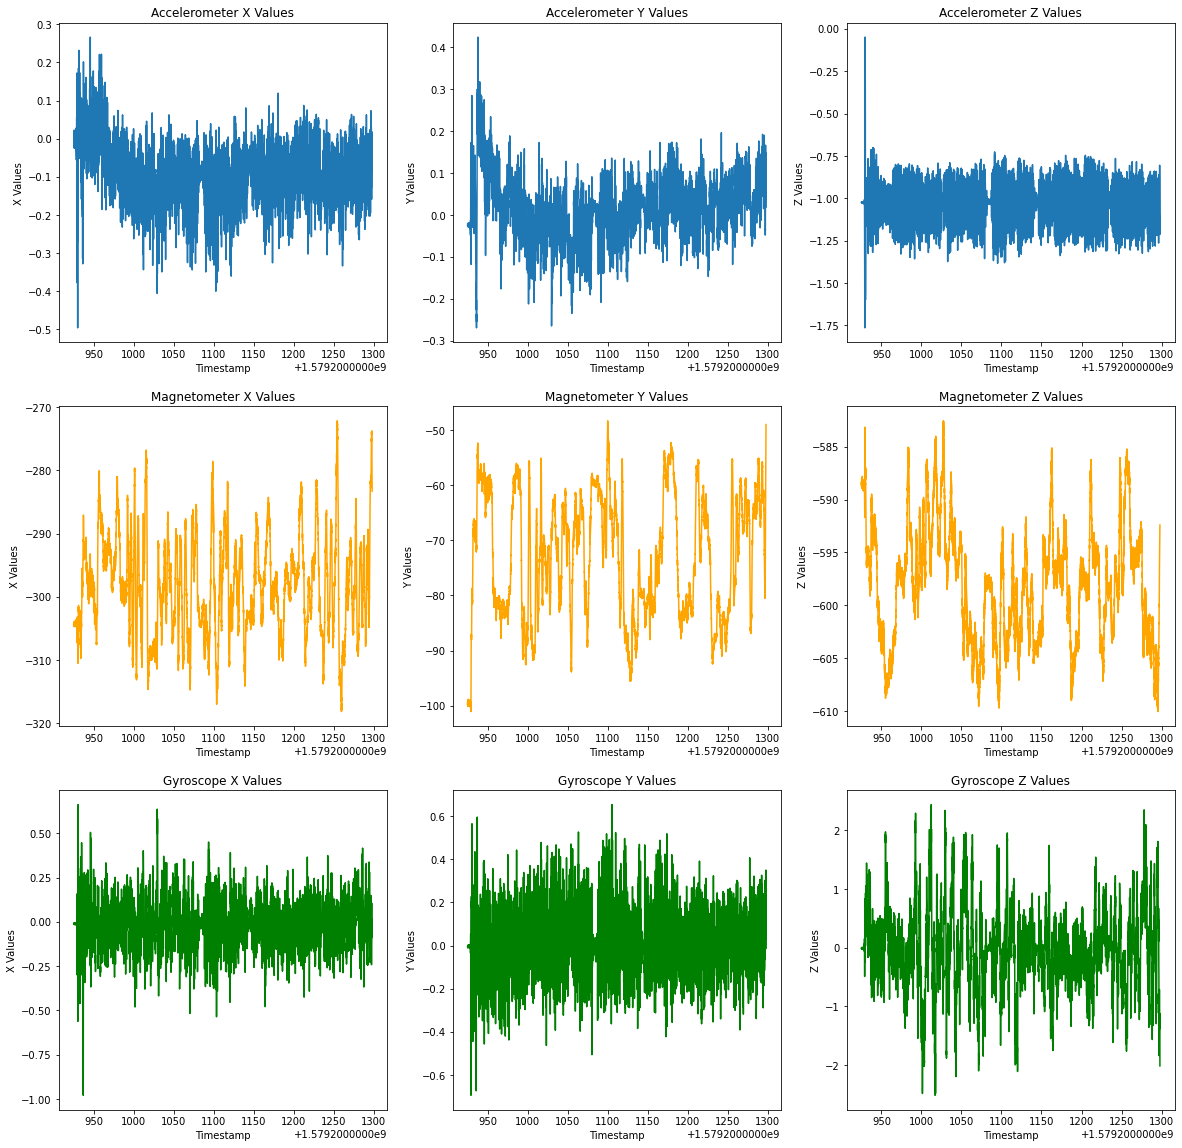

In [20]:
timestamp = df["timestamp"]

acc_x = df["iphoneAccX"]
acc_y = df["iphoneAccY"]
acc_z = df["iphoneAccZ"]

mag_x = df["iphoneMagX"]
mag_y = df["iphoneMagY"]
mag_z = df["iphoneMagZ"]

gyro_x = df["iphoneGyroX"]
gyro_y = df["iphoneGyroY"]
gyro_z = df["iphoneGyroZ"]

fig, axis = plt.subplots(3, 3, figsize=(20, 20))

axis[0,0].plot(timestamp, acc_x)
axis[0,0].set_title("Accelerometer X Values")
axis[0,0].set_xlabel("Timestamp")
axis[0,0].set_ylabel("X Values")

axis[0,1].plot(timestamp, acc_y)
axis[0,1].set_title("Accelerometer Y Values")
axis[0,1].set_xlabel("Timestamp")
axis[0,1].set_ylabel("Y Values")

axis[0,2].plot(timestamp, acc_z)
axis[0,2].set_title("Accelerometer Z Values")
axis[0,2].set_xlabel("Timestamp")
axis[0,2].set_ylabel("Z Values")

axis[1,0].plot(timestamp, mag_x, "orange")
axis[1,0].set_title("Magnetometer X Values")
axis[1,0].set_xlabel("Timestamp")
axis[1,0].set_ylabel("X Values")

axis[1,1].plot(timestamp, mag_y, "orange")
axis[1,1].set_title("Magnetometer Y Values")
axis[1,1].set_xlabel("Timestamp")
axis[1,1].set_ylabel("Y Values")

axis[1,2].plot(timestamp, mag_z, "orange")
axis[1,2].set_title("Magnetometer Z Values")
axis[1,2].set_xlabel("Timestamp")
axis[1,2].set_ylabel("Z Values")

axis[2,0].plot(timestamp, gyro_x, "green")
axis[2,0].set_title("Gyroscope X Values")
axis[2,0].set_xlabel("Timestamp")
axis[2,0].set_ylabel("X Values")

axis[2,1].plot(timestamp, gyro_y, "green")
axis[2,1].set_title("Gyroscope Y Values")
axis[2,1].set_xlabel("Timestamp")
axis[2,1].set_ylabel("Y Values")

axis[2,2].plot(timestamp, gyro_z, "green")
axis[2,2].set_title("Gyroscope Z Values")
axis[2,2].set_xlabel("Timestamp")
axis[2,2].set_ylabel("Z Values")


fig.savefig("acc_mag_gyro.png", dpi=300, bbox_inches = "tight")

# Magnetometer Data Points

Text(0.5, 0, 'iPhone Magnetometer Z')

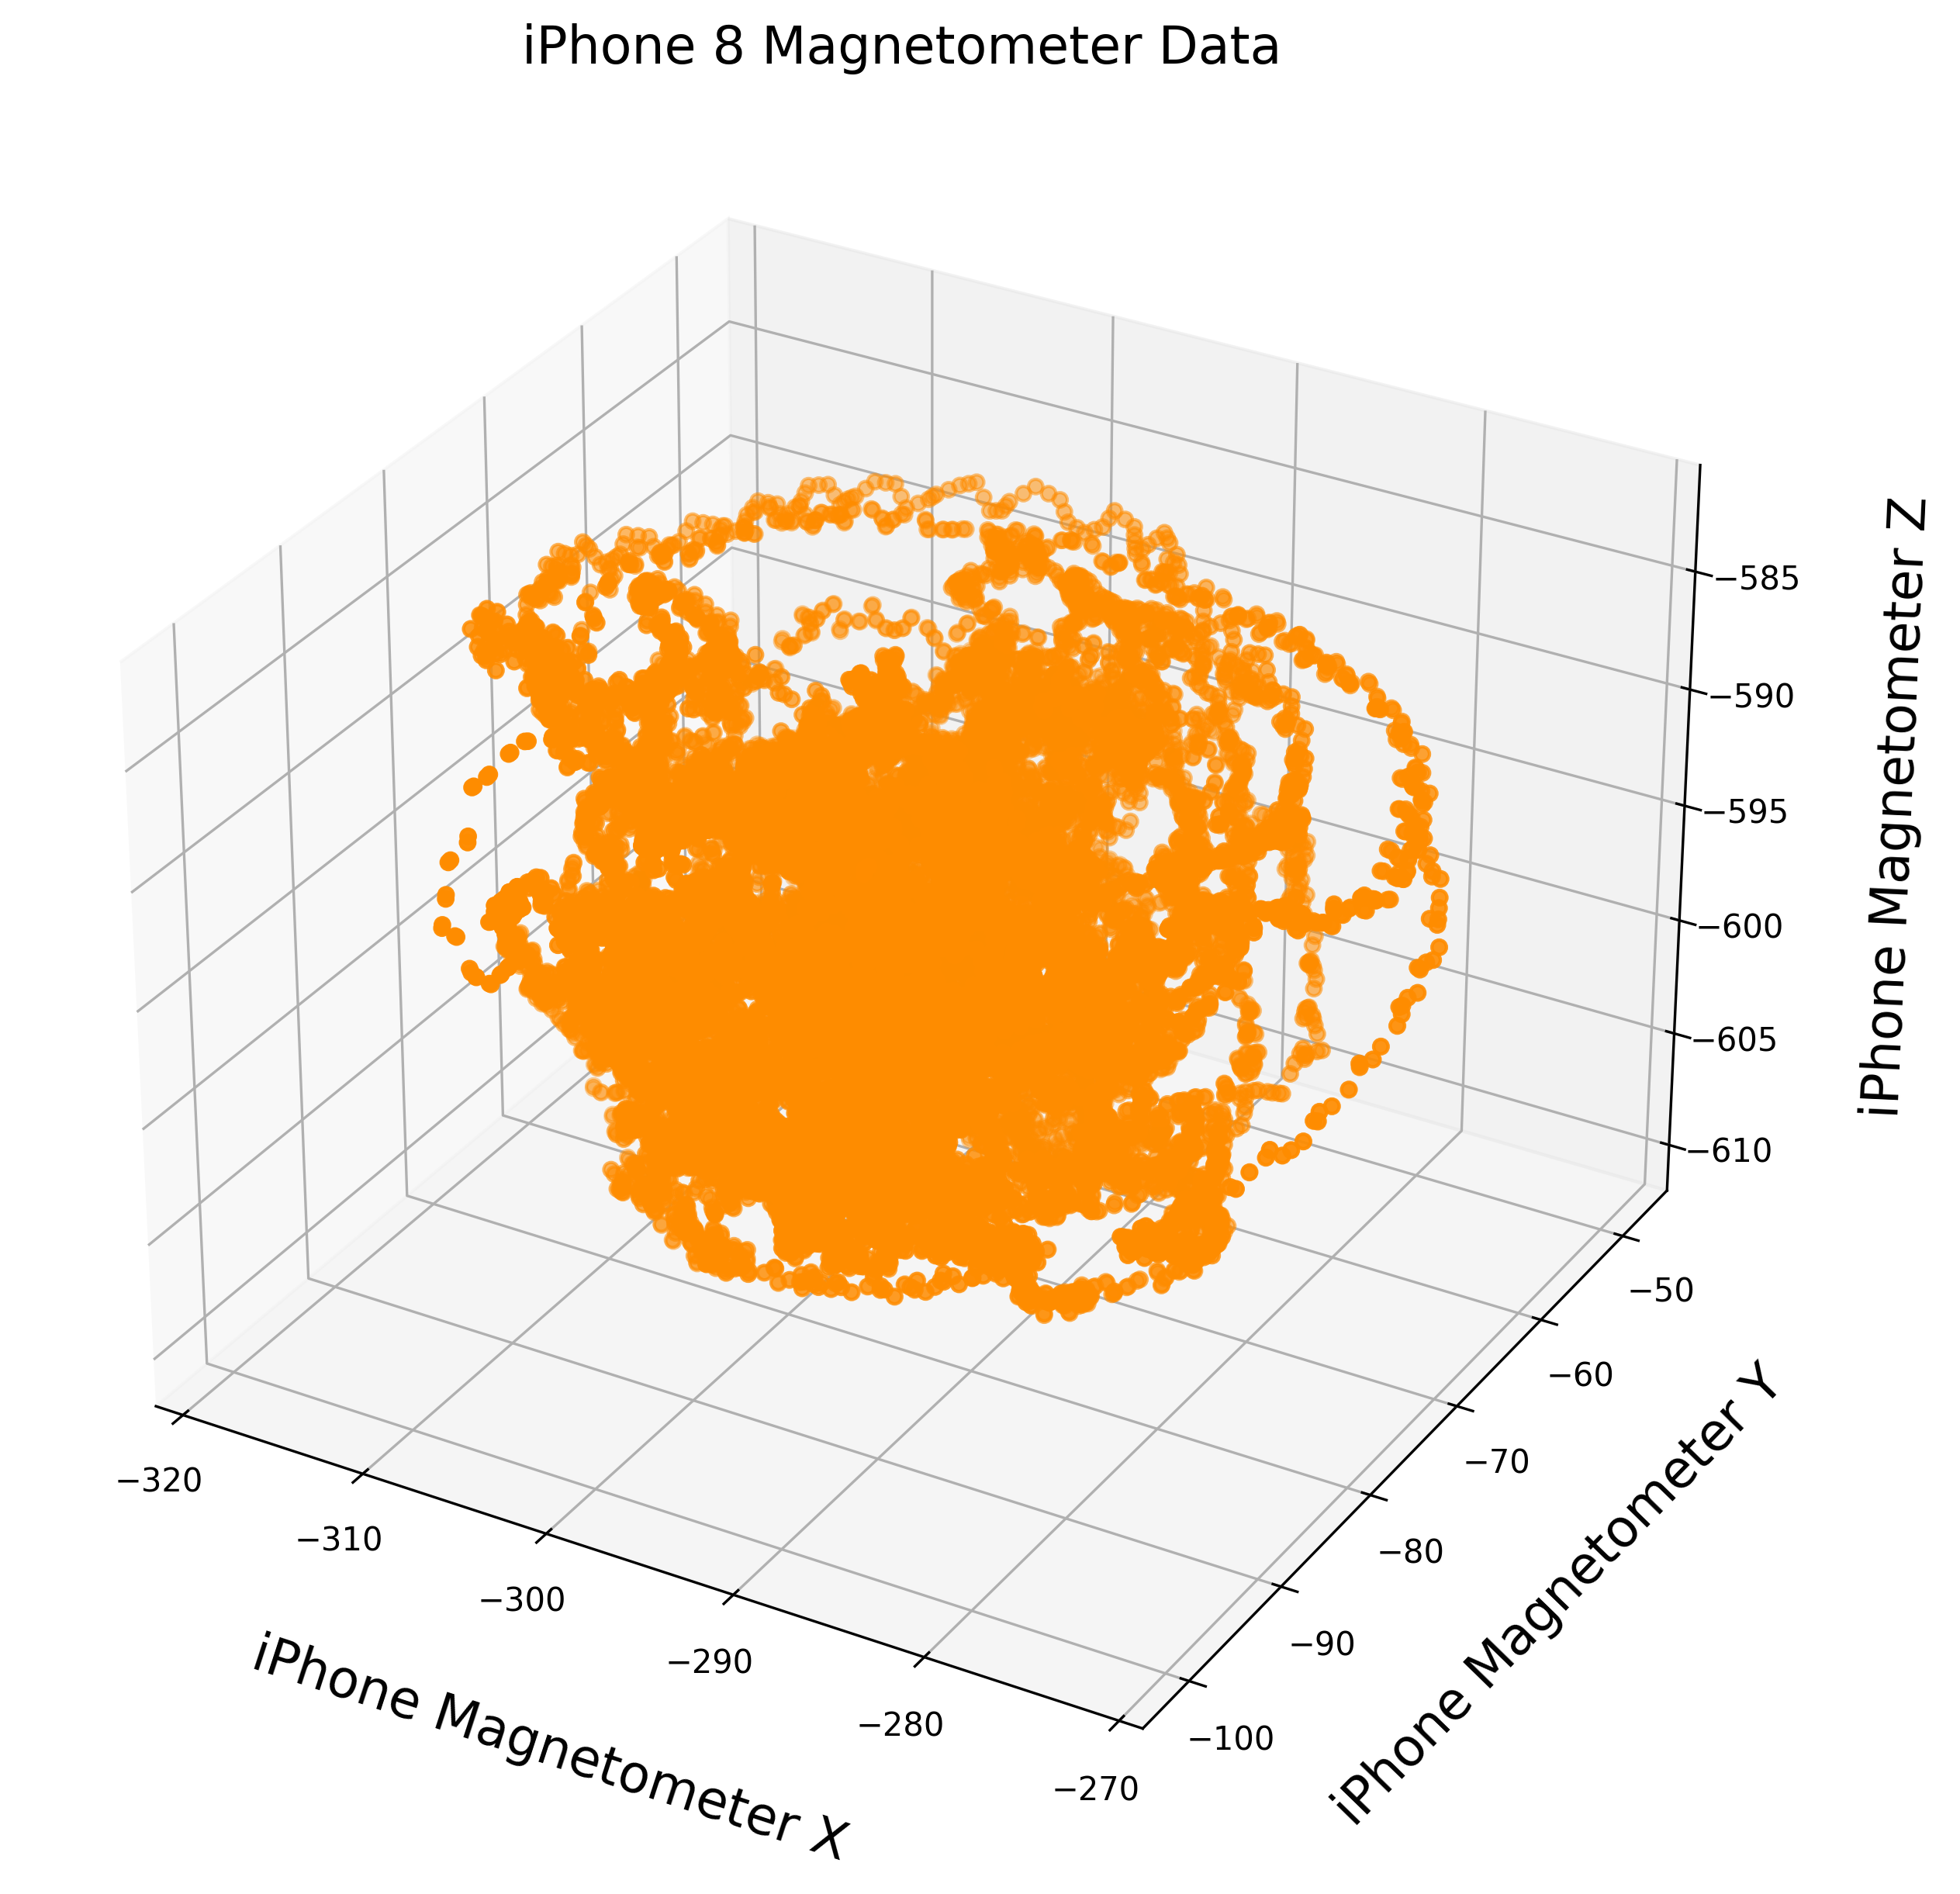

In [28]:
fig = plt.figure(dpi=300, figsize=(10, 10))
ax = plt.axes(projection= "3d")
ax.scatter(mag_x, mag_y, mag_z, zdir = "z", rasterized=True, color="darkorange")
ax.set_title("iPhone 8 Magnetometer Data", fontsize=16)
ax.set_xlabel("iPhone Magnetometer X", fontsize=16, labelpad=20)
ax.set_ylabel("iPhone Magnetometer Y", fontsize=16, labelpad=20)
ax.set_zlabel("iPhone Magnetometer Z", fontsize=16, labelpad=20)

fig.savefig("magnetometer.png", dpi=300, bbox_inches = "tight")

In [29]:
from app.services.preprocessor import PreProcessor
from pprint import pprint


pre = PreProcessor()

data = df[["iphoneMagX", "iphoneMagY", "iphoneMagZ"]].to_numpy()

center, evecs, radii = pre.ellipsoid_fit(data, mode=1)
centered_data = data - center

# Ellipsoid radii coefficients for plotting
a = radii[0]
b = radii[1]
c = radii[2]


# u/v values to generate cosine and sine data for ellipsoid
u = np.linspace(0., np.pi*2., 30) 
v = np.linspace(0., np.pi, 30)
u, v = np.meshgrid(u,v) # coordinate matrices 

x = a*np.cos(u)*np.sin(v)
y = b*np.sin(u)*np.sin(v)
z = c*np.cos(v)

xx = x.flatten()
yy = y.flatten()
zz = z.flatten()

fig = plt.figure(dpi=300, figsize=(10,10))
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(x, y, z, color = "dodgerblue", edgecolors = "blue",  rstride=1, cstride=1, linewidth = 3)
ax.scatter(centered_data[:, 0], centered_data[:, 1], centered_data[:, 2], 
            alpha = 0.1, zdir = "z", rasterized = True, color = "darkorange")
ax.set_title("iPhone 8 Magnetometer Ellipsoid Best Fit", fontsize=16)
ax.set_xlabel("iPhone Magnetometer X", fontsize=16)
ax.set_ylabel("iPhone Magnetometer Y", fontsize=16)
ax.set_zlabel("iPhone Magnetometer Z", fontsize=16)

ModuleNotFoundError: No module named 'app'

# First Look

1. Data is mostly a random walk. 
2. RNNs are suitable due to the sequential nature of trajectory of a person walking from point A to point B. 
3. Important columns for RNN are iphone Acc, Gyro and Mag.
4. IMU data from stencil is used to compare RNN results. 
5. OrientWXYZ (Stencil not iPhone) and PositionWXYZ are ground truth columns for OrientNet and PosNet respectively.
6. Magnetometer uses an Ellipsoid Fit in order to calibrate the readings of that instrument. 
7. Ellipsoid fit is custom, paper does NOT specify what they did other than mentioning they used a "traditional ellipsoid fitting". In the graph above Least Squares Ellipsoid fitting is used. 

In [ ]:
df2 = pd.read_csv("datasets/csvs/train.csv")
df2.shape()